In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('Iris.csv')

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.drop(columns='Id',inplace=True)

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
import seaborn as sns

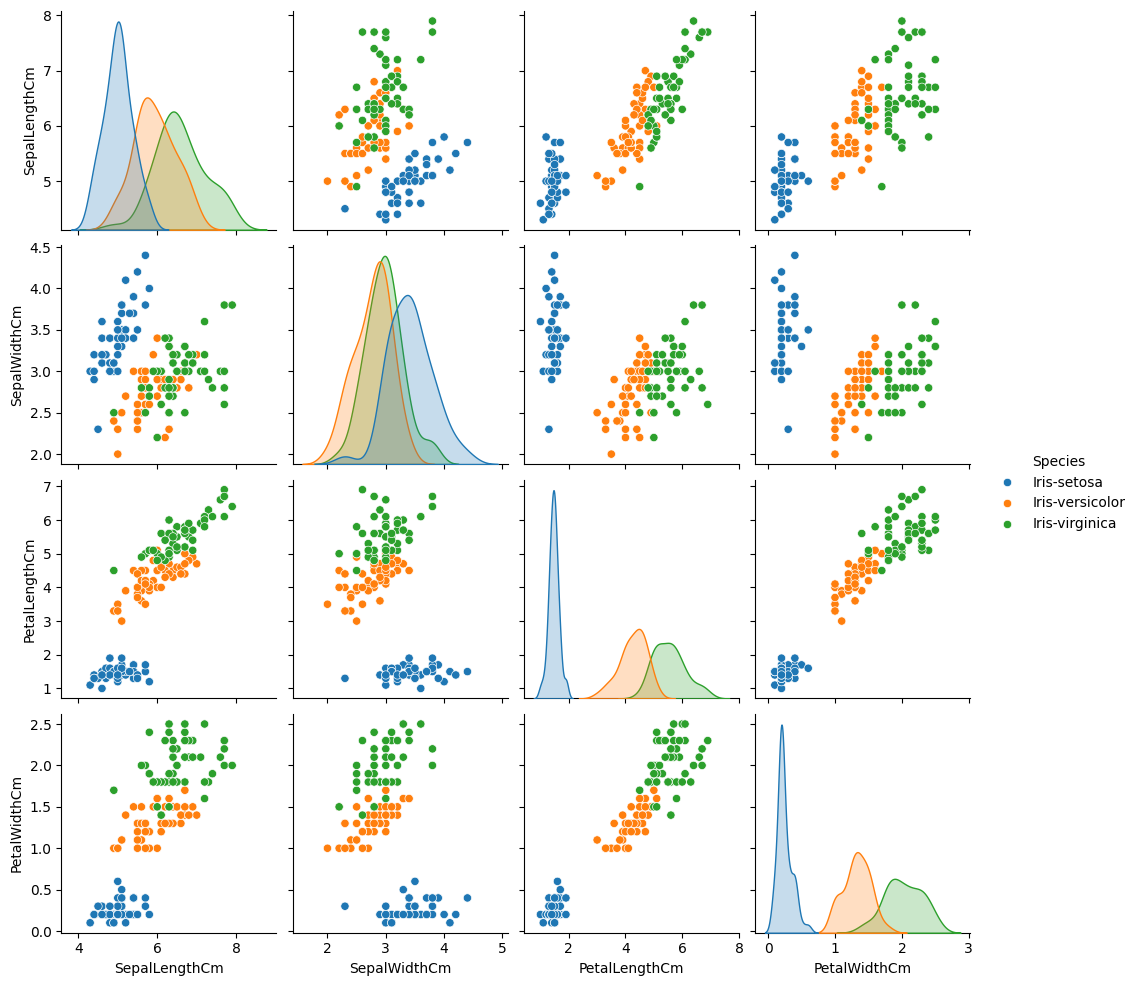

In [13]:
sns.pairplot(df,hue='Species')

In [57]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

import matplotlib.pyplot as plt

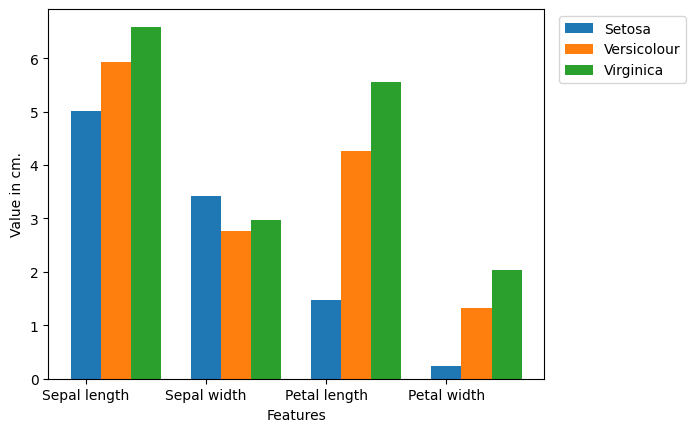

In [20]:
# Calculate average of each features for all classes
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

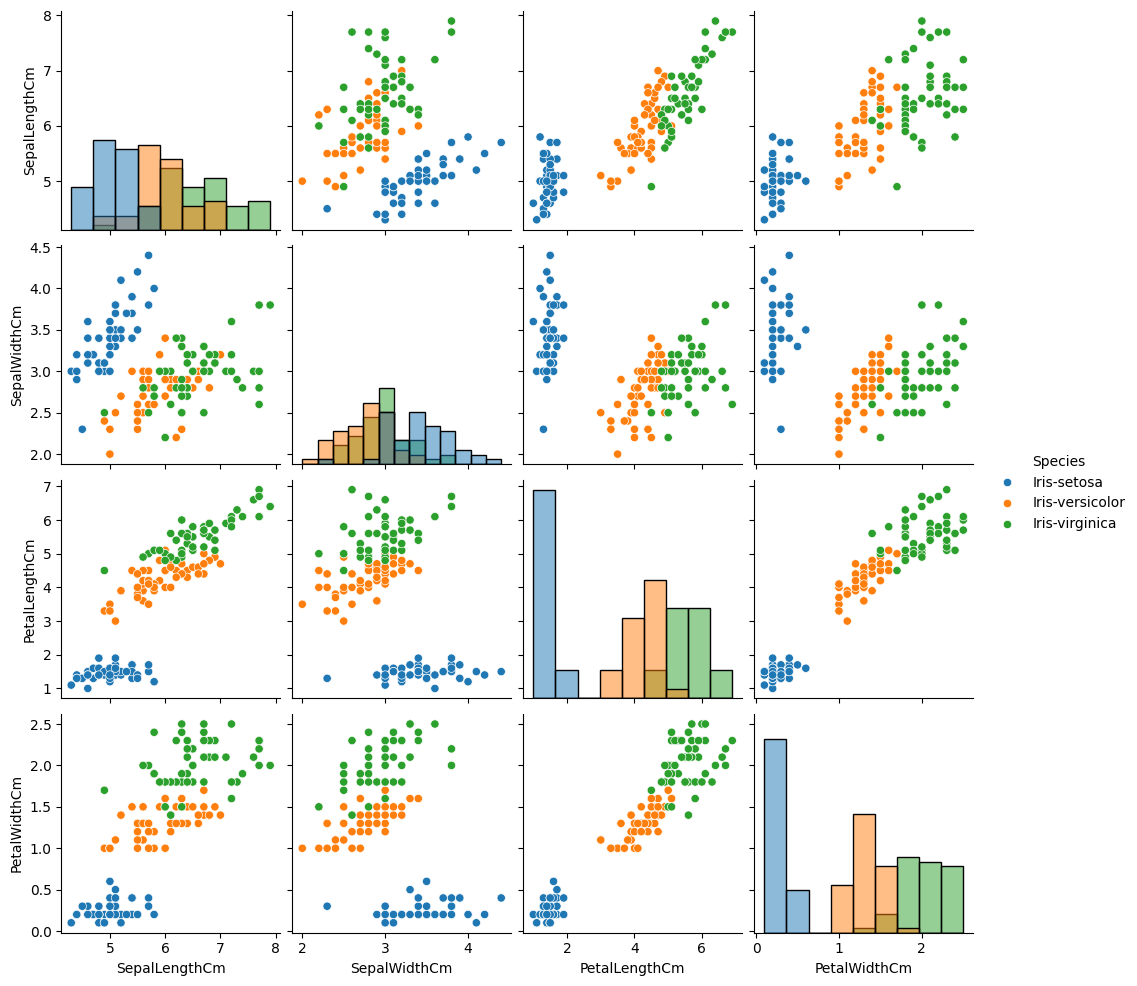

In [24]:
# Create a pair plot
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()

In [28]:
import plotly.express as px
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
                    color='Species', title='3D Scatter Plot of Iris Dataset')
fig.show()

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train,y_train)

SVC()

In [41]:
y_pred = svn.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [39]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [58]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(SVC(kernel='linear'),X,Y,cv=10,scoring='accuracy'))

0.9733333333333334

In [59]:
from sklearn.neighbors import KNeighborsClassifier
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5),X,Y,cv=10,scoring='accuracy'))

0.9666666666666668

In [60]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, Y, cv=10, scoring='accuracy')
print(np.mean(scores))

0.96


In [61]:
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=200), X, Y, cv=10, scoring='accuracy')
print(np.mean(scores))

0.9733333333333334


In [62]:
from xgboost import XGBClassifier
scores = cross_val_score(XGBClassifier(n_estimators=50, learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
print(np.mean(scores))

0.96


In [63]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])

In [64]:
from sklearn.neural_network import MLPClassifier
scores = cross_val_score(MLPClassifier(max_iter=500), X, Y, cv=10, scoring='accuracy')
print(np.mean(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [73]:
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(max_depth=3), X, Y, cv=10, scoring='accuracy')
print(np.mean(scores))

0.96
